## SVM (Support Vector Machine)
### SVM
- Use : Classification
- Data --> SVM (Classifier)(Categories)
SVM is a supervised algorithm that classifies cases by finding a seperator
- Map Data to a high dimensional feature space
- finding a seperator --> seperator can be a hyperplane
SVM gives us an optimal hyperplane that categorized prediction

### Data Transformation
- 1D --> non-linear seperator --> 2D --> linearly seperated
- This will help us to classify new cases 
- Mapping Data into higher dimensional space is called kernalling (1D->2D->3D)
- Kernal function --> used for Transformation 
-                  -> Types [{1. Linear}
-                           {2. Polynomial}
-                           {3. RBF (Radio Basis Function)}
-                           {Sigmoid}] Kernalling Setup

Test all and choose the best one.
SVM  to find the best(Right / Optimal) hyperplane
Based o finding a hyperplane that best divides the data into classes.
- Best hyperplane
- Bigger Margins as possible
- SVS closet to the hyperplane
Hyperplane -> Maximum distance to support vectors (SVS) -- wx+b=0
Boundry Decision Line :
- Above line: wx+b=+1
- Below line: wx+b=-1
- Finding an optimized hyperplane need an equation (Check That By Yourself)

Calculate a new point and Check whether its Above or Below the line:
- If predicted value is greater than 0 -- predicted > 0 --> Above line
- If predicted value is less than 0 -- predicted < 0 --> Below line

### Pros
1. Accurate in high dimension
2. use subset of training point in Decision function called support vectors --> not whate data - memory efficiet

## Cons 
1. overfitting only if  - no. of feature > no. of sample
2. SVM don't provide probability (might be required for some classification)
3. Not good for big datasets for computation purpose - row < 1000

## SVM Application
- Image Recognition
- text mining
- gene expression classification
- regression, outliers, detection, clusters



In [4]:
# Hands On Practice

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn import svm

In [6]:
cancer = load_breast_cancer()
# Print the Features Of Data
print("Features :", cancer.feature_names)
# Print the label type of Data ('malignant' 'benign')
print("Label :", cancer.target_names)
cancer.data.shape # prints data shape


Features : ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Label : ['malignant' 'benign']


(569, 30)

In [7]:
print(cancer.data[0:5])

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414

In [8]:
print(cancer.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [9]:
import pandas as pd

  
data = cancer['data']  
target = cancer['target']  
target_names = cancer['target_names']
df = pd.concat([pd.DataFrame(data), pd.DataFrame(target, columns=['target'])], axis=1)
# df.columns = cancer['feature_names'] + ['target']
df.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [10]:
x = df.iloc[:,:-1]
y = df['target']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [13]:
clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)

In [20]:
# importing libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import r2_score

In [21]:
# Accuracy
score = metrics.accuracy_score(y_test, y_predict)
r2_score = metrics.r2_score(y_test, y_predict)
recall = metrics.recall_score(y_test, y_predict)
confusion = metrics.confusion_matrix(y_test, y_predict)
print(score)
print(confusion)
print(r2_score)
print(recall)


0.956140350877193
[[46  1]
 [ 4 63]]
0.8189901556049539
0.9402985074626866


Text(77.92222222222227, 0.5, 'Prediction Value')

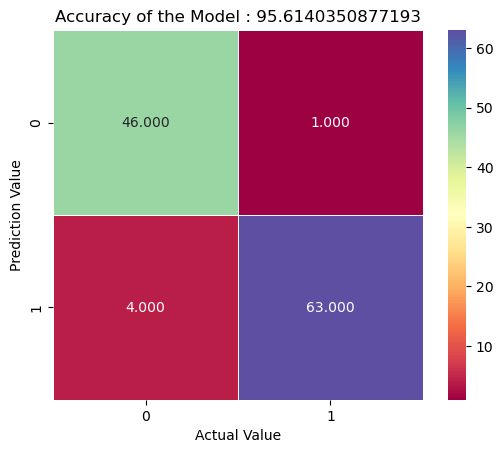

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion, annot=True, fmt='.3f', linewidths=.5, square=True, cmap="Spectral")
plt.title(f"Accuracy of the Model : {score*100}")
plt.xlabel('Actual Value')
plt.ylabel('Prediction Value')
